# Modelo de machine learning - Hiper-parametros

![title](img/img_01.png)

**Contexto**

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.

**Contente**

Os conjuntos de dados consistem em várias variáveis ​​preditoras médicas e uma variável de destino Outcome,. As variáveis preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.


**Objetivos**

Prever com precisão se os pacientes no conjunto de dados têm diabetes ou não?

In [1]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.7.4


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

seaborn   : 0.9.0
pandas    : 1.1.3
matplotlib: 3.1.1
numpy     : 1.16.5



In [4]:
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
min = df.Glucose.min()
min

0

In [11]:
max = df.Glucose.max()
max

199

In [12]:
df.Age.count()

768

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


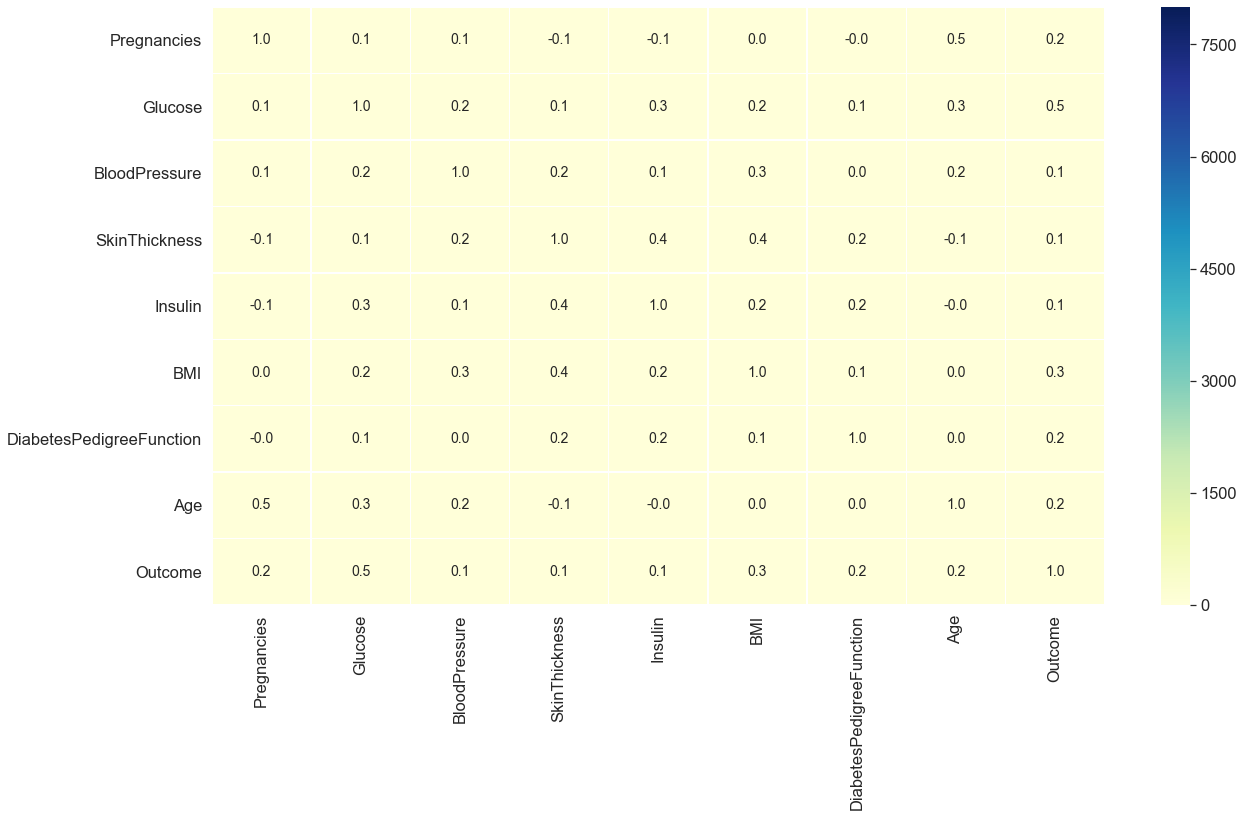

In [15]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(corr, vmin=0, vmax=8000, cmap="YlGnBu", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

# Análise exploratória de dados

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


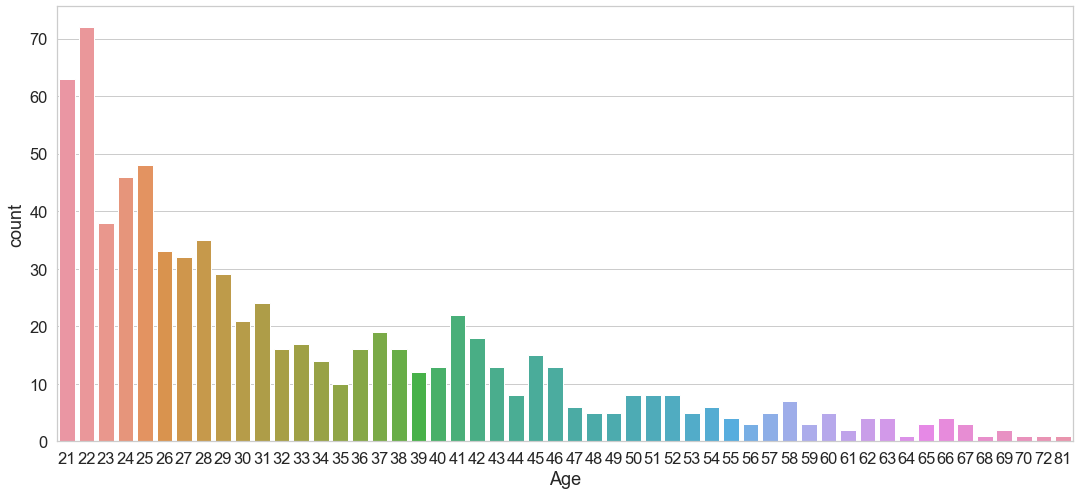

In [17]:
plt.figure(figsize=(18.2, 8))

ax = sns.countplot(df["Age"])

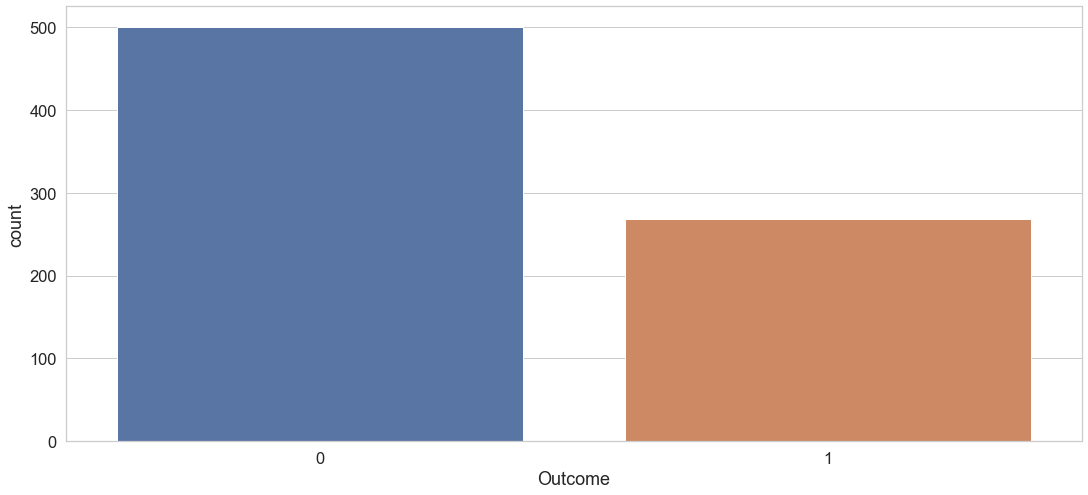

In [18]:
plt.figure(figsize=(18.2, 8))

ax = sns.countplot(df["Outcome"])

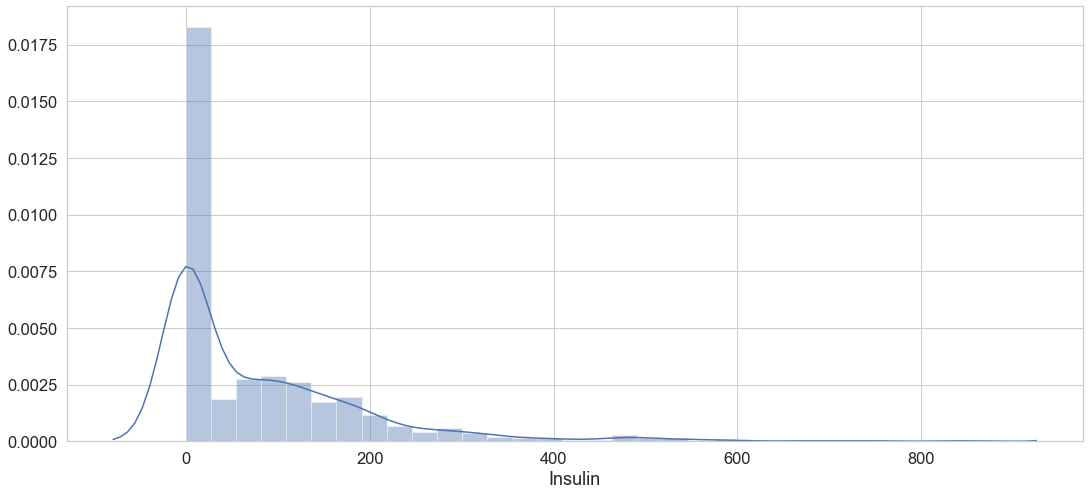

In [19]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df["Insulin"])

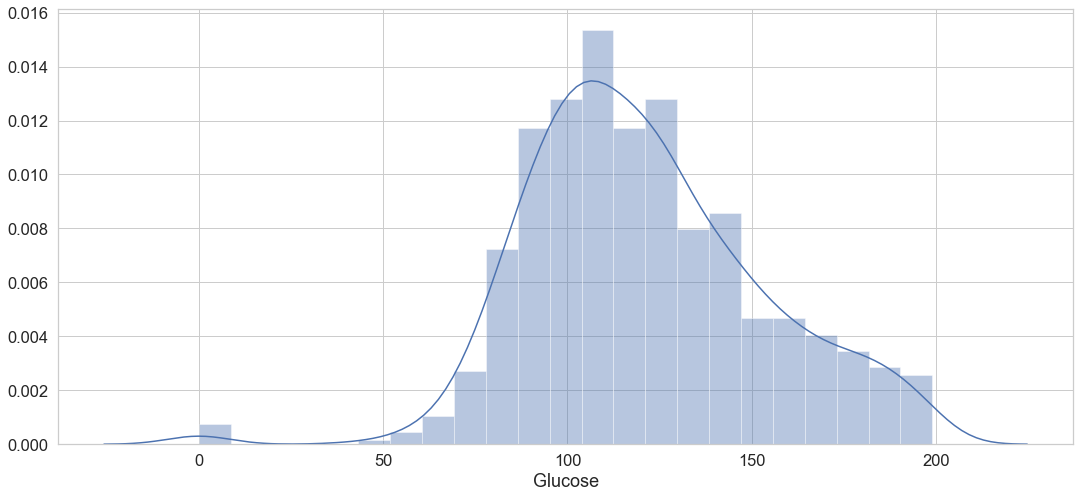

In [20]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df["Glucose"])

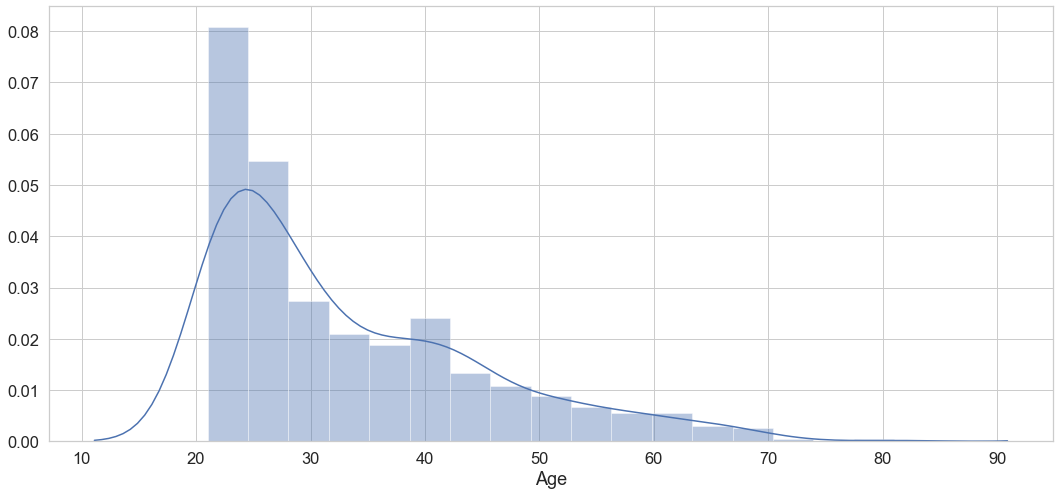

In [21]:
plt.figure(figsize=(18, 8))

ax = sns.distplot(df["Age"])

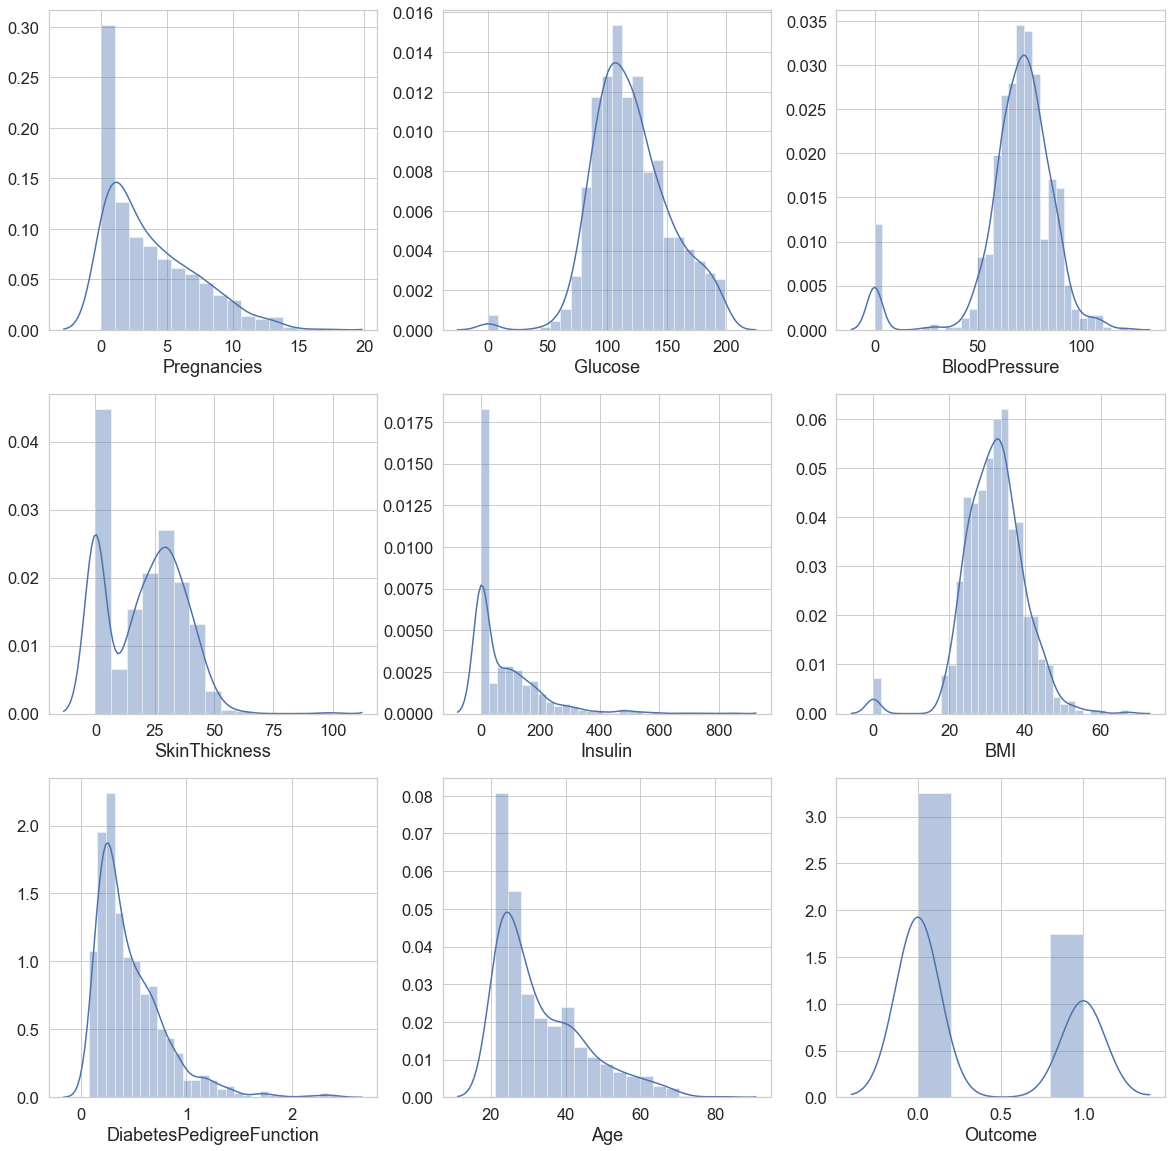

In [22]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(df["Pregnancies"] , ax=axes[0, 0])
sns.distplot(df["Glucose"] ,  ax=axes[0, 1])
sns.distplot(df["BloodPressure"] , ax=axes[0, 2])
sns.distplot(df["SkinThickness"], ax=axes[1, 0] )
sns.distplot(df["Insulin"] , ax=axes[1, 1] )
sns.distplot(df["BMI"] , ax=axes[1, 2] )
sns.distplot(df["DiabetesPedigreeFunction"] , ax=axes[2, 0])
sns.distplot(df["Age"], ax=axes[2, 1])
sns.distplot(df["Outcome"], ax=axes[2, 2])
plt.show()

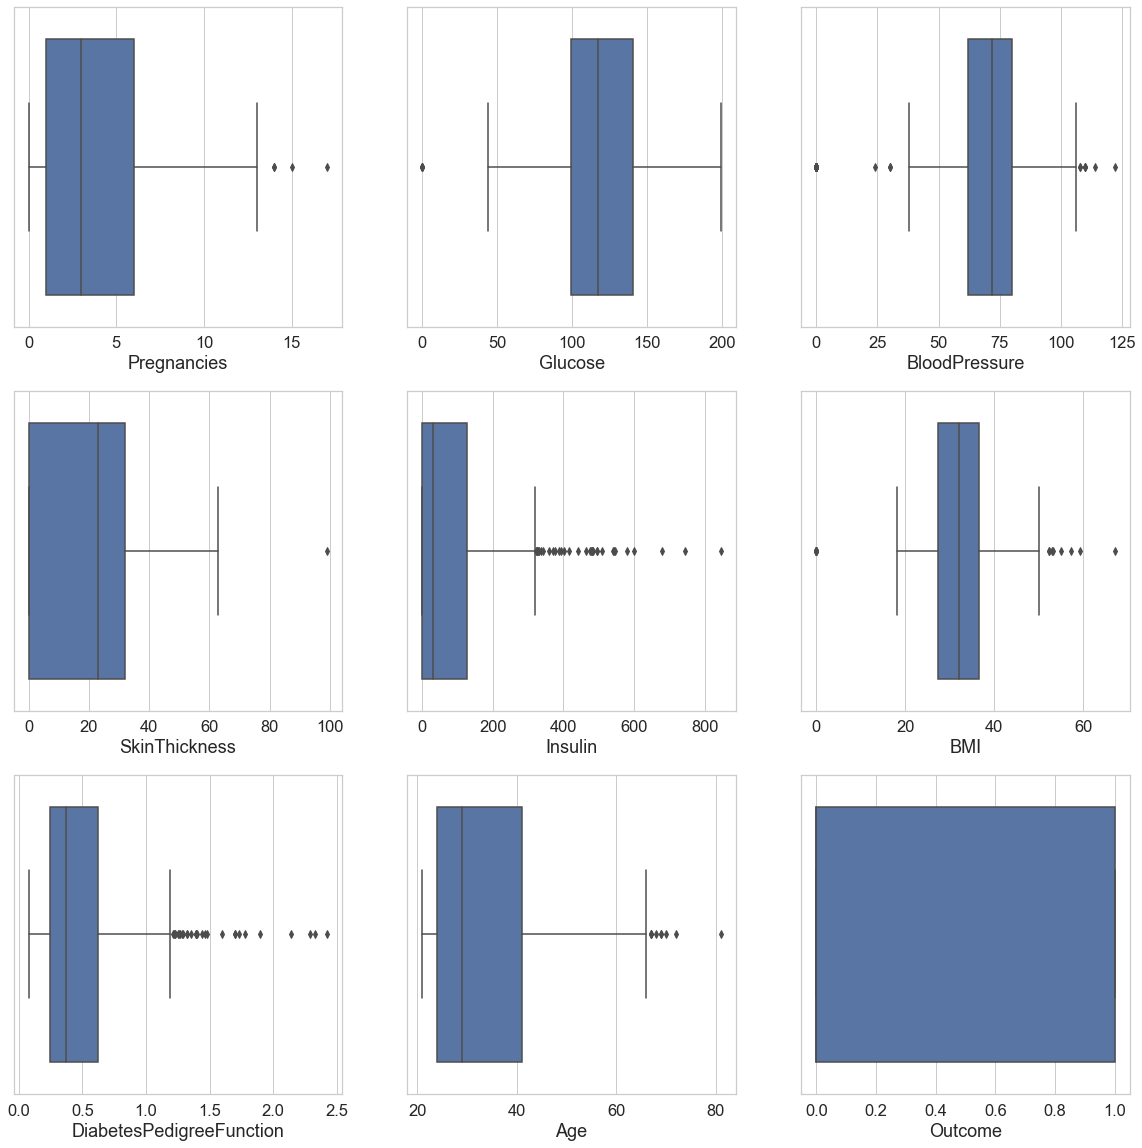

In [23]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.boxplot(df["Pregnancies"] , ax=axes[0, 0])
sns.boxplot(df["Glucose"] ,  ax=axes[0, 1])
sns.boxplot(df["BloodPressure"] , ax=axes[0, 2])
sns.boxplot(df["SkinThickness"], ax=axes[1, 0] )
sns.boxplot(df["Insulin"] , ax=axes[1, 1] )
sns.boxplot(df["BMI"] , ax=axes[1, 2] )
sns.boxplot(df["DiabetesPedigreeFunction"] , ax=axes[2, 0])
sns.boxplot(df["Age"], ax=axes[2, 1])
sns.boxplot(df["Outcome"], ax=axes[2, 2])
plt.show()

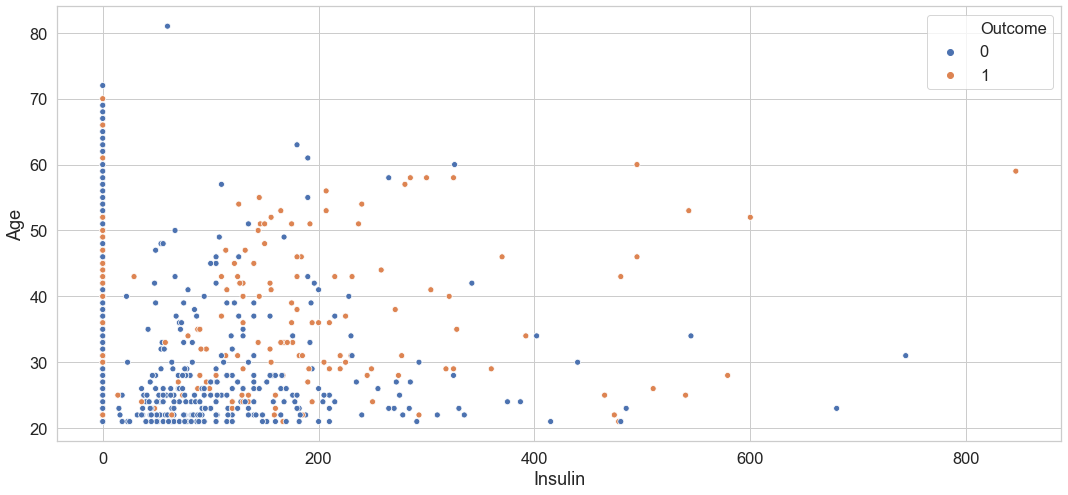

In [24]:
plt.figure(figsize=(18, 8))

ax = sns.scatterplot(x="Insulin", y="Age", data = df, hue="Outcome")

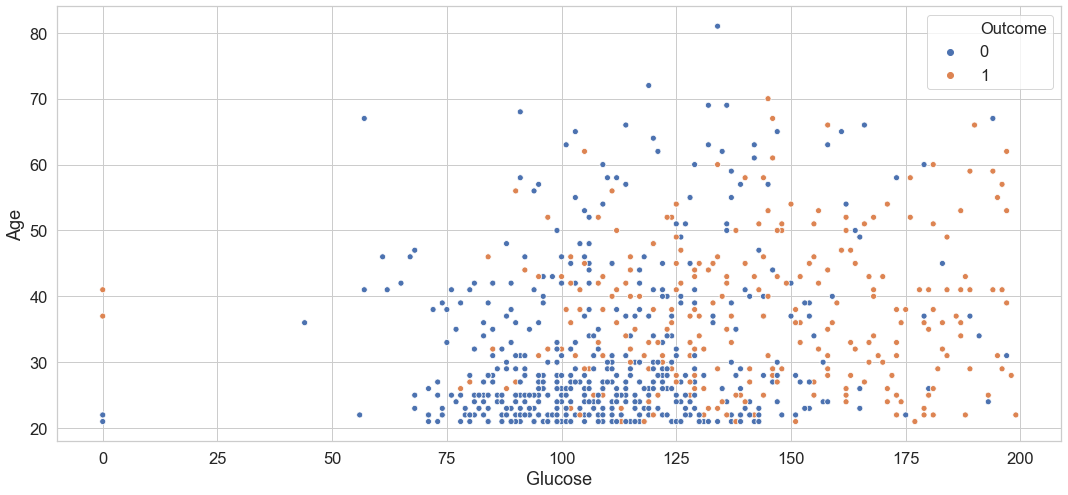

In [25]:
plt.figure(figsize=(18, 8))

ax = sns.scatterplot(x="Glucose", y="Age", data = df, hue="Outcome")

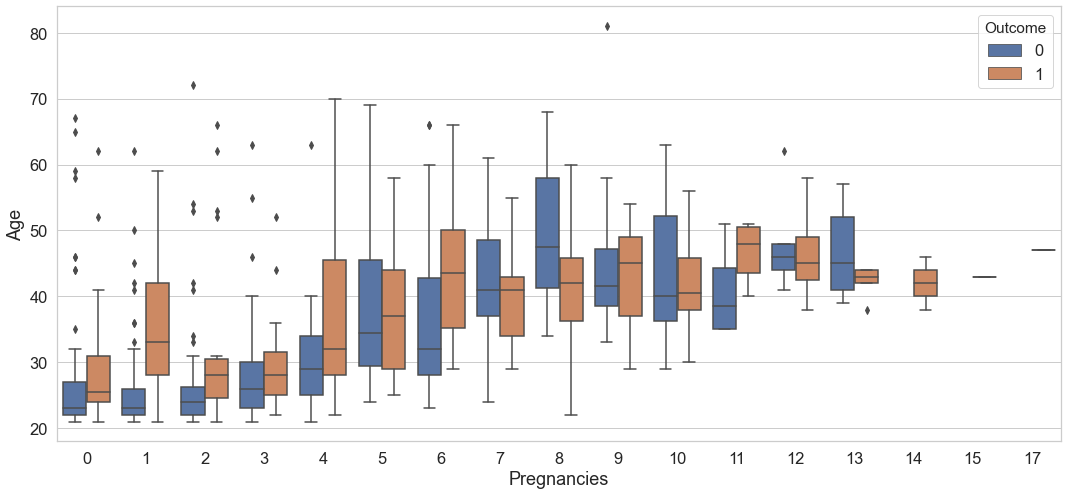

In [26]:
plt.figure(figsize=(18, 8))

ax = sns.boxplot(x="Pregnancies", y="Age", data = df, hue="Outcome")

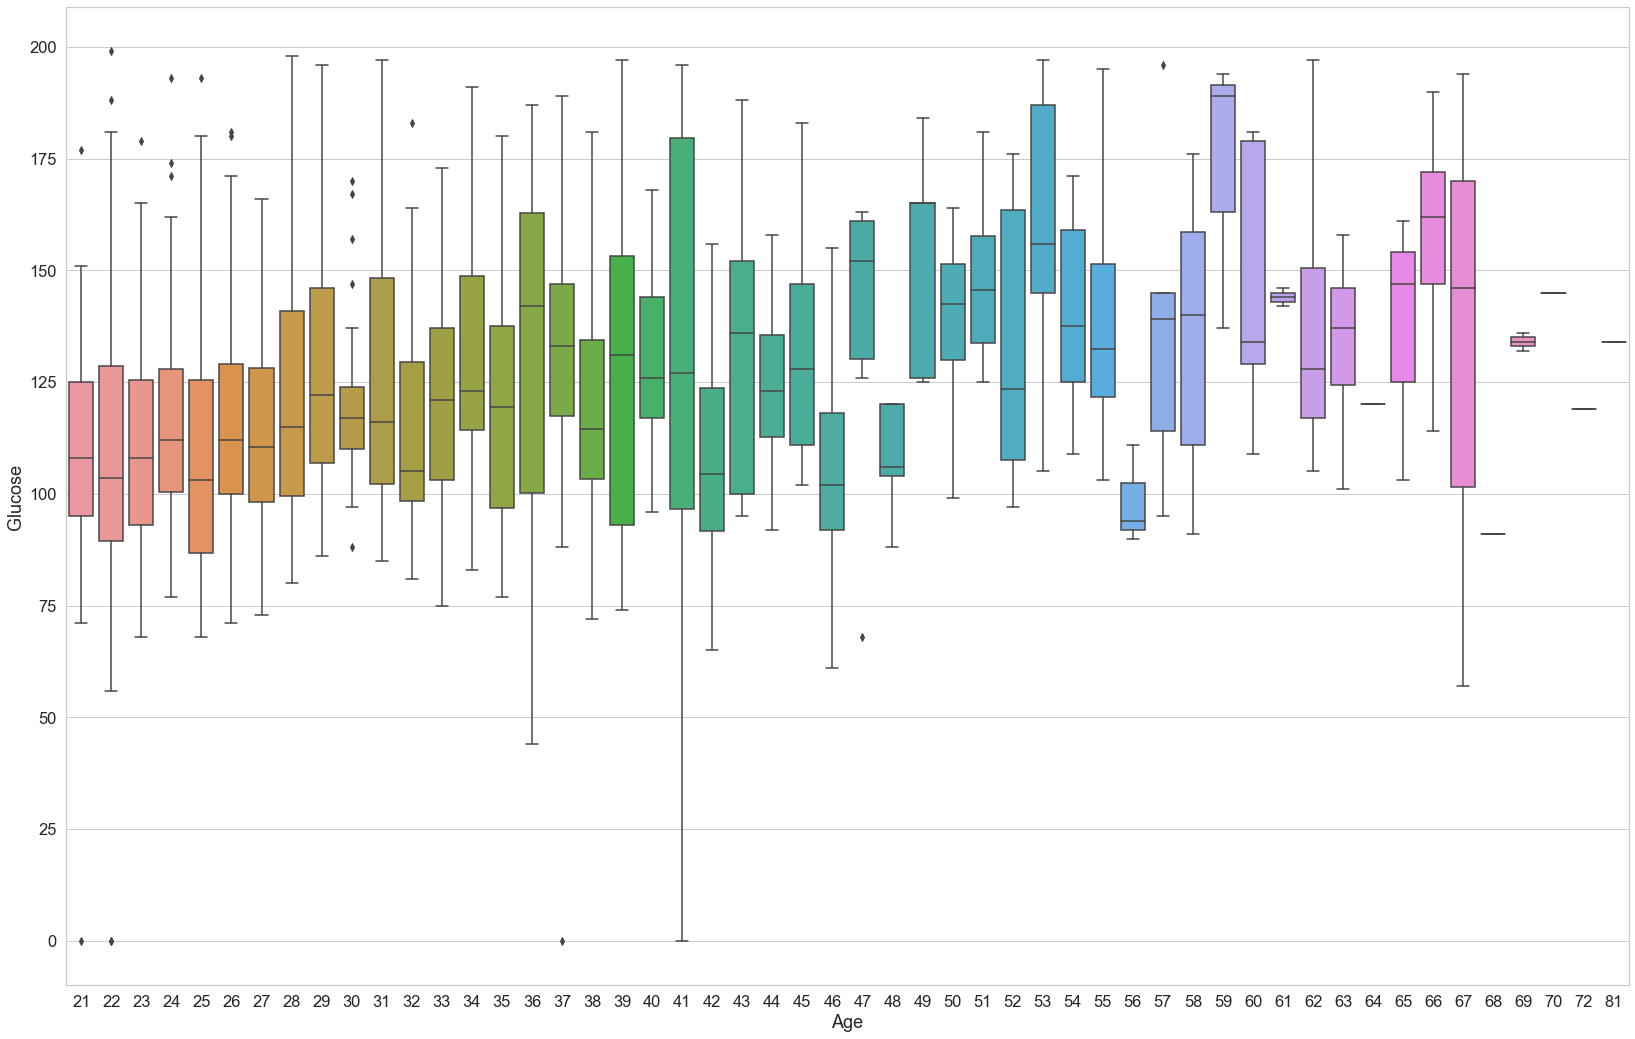

In [27]:
plt.figure(figsize=(28, 18))

sns.boxplot(x="Age", y="Glucose", data = df)

# Treino e Teste

In [28]:
x = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

In [29]:
x.shape

(768, 8)

In [30]:
y.shape

(768,)

# Treino e teste do modelo

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [32]:
x_train.shape

(384, 8)

In [33]:
y_train.shape

(384,)

In [34]:
x_test.shape

(384, 8)

In [35]:
y_test.shape

(384,)

# Modelo de machine learning
**Modelo 1 - Regressão logistica**

In [36]:
from sklearn.linear_model import LogisticRegression

model_logistic_reg = LogisticRegression()
model_logistic_reg_fit = model_logistic_reg.fit(x_train, y_train)
model_logistic_reg_scor = model_logistic_reg.score(x_train, y_train)
model_logistic_reg_scor

0.7630208333333334

In [37]:
model_logistic_reg_pred = model_logistic_reg.predict(x_test)
model_logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

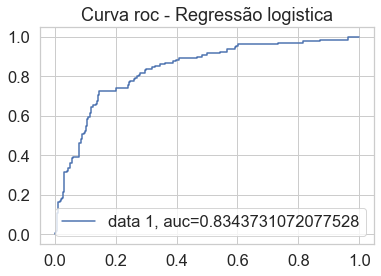

In [129]:
from sklearn import metrics

roc_g = model_logistic_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Regressão logistica")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, model_logistic_reg_pred)
print("Acurácia - Regressão logistica: %.2f" % (accuracy * 100))

Acurácia - Regressão logistica: 79.95


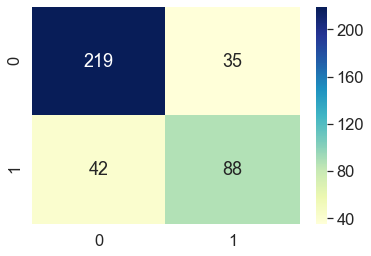

In [40]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, model_logistic_reg_pred)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

In [41]:
from sklearn.metrics import classification_report

class_report = classification_report(y_train, model_logistic_reg_pred)
print("Modelo 01 - Regressão logistica")
print("\n")
print(class_report)

Modelo 01 - Regressão logistica


              precision    recall  f1-score   support

           0       0.62      0.66      0.64       246
           1       0.33      0.29      0.31       138

    accuracy                           0.53       384
   macro avg       0.47      0.48      0.47       384
weighted avg       0.52      0.53      0.52       384



In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Modelo - 01 Regressão logística")
print("\n")
print("Precision - Regressão logística = {}".format(precision_score(y_test, model_logistic_reg_pred, average='macro')))
print("Recall - Regressão logística = {}".format(recall_score(y_test, model_logistic_reg_pred, average='macro')))
print("Accuracy - Regressão logística = {}".format(accuracy_score(y_test, model_logistic_reg_pred)))
print("F1 Score - Regressão logística = {}".format(f1_score(y_test, model_logistic_reg_pred, average='macro')))

Modelo - 01 Regressão logística


Precision - Regressão logística = 0.7772638071208298
Recall - Regressão logística = 0.7695639006662629
Accuracy - Regressão logística = 0.7994791666666666
F1 Score - Regressão logística = 0.7730688054031236


# Modelo de machine learning
**Modelo 2 - Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth = 3)
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)
modelo_arvore_scor

0.765625

In [44]:
modelo_arvore_pred = modelo_arvore_cla_1.predict(x_train)
modelo_arvore_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,

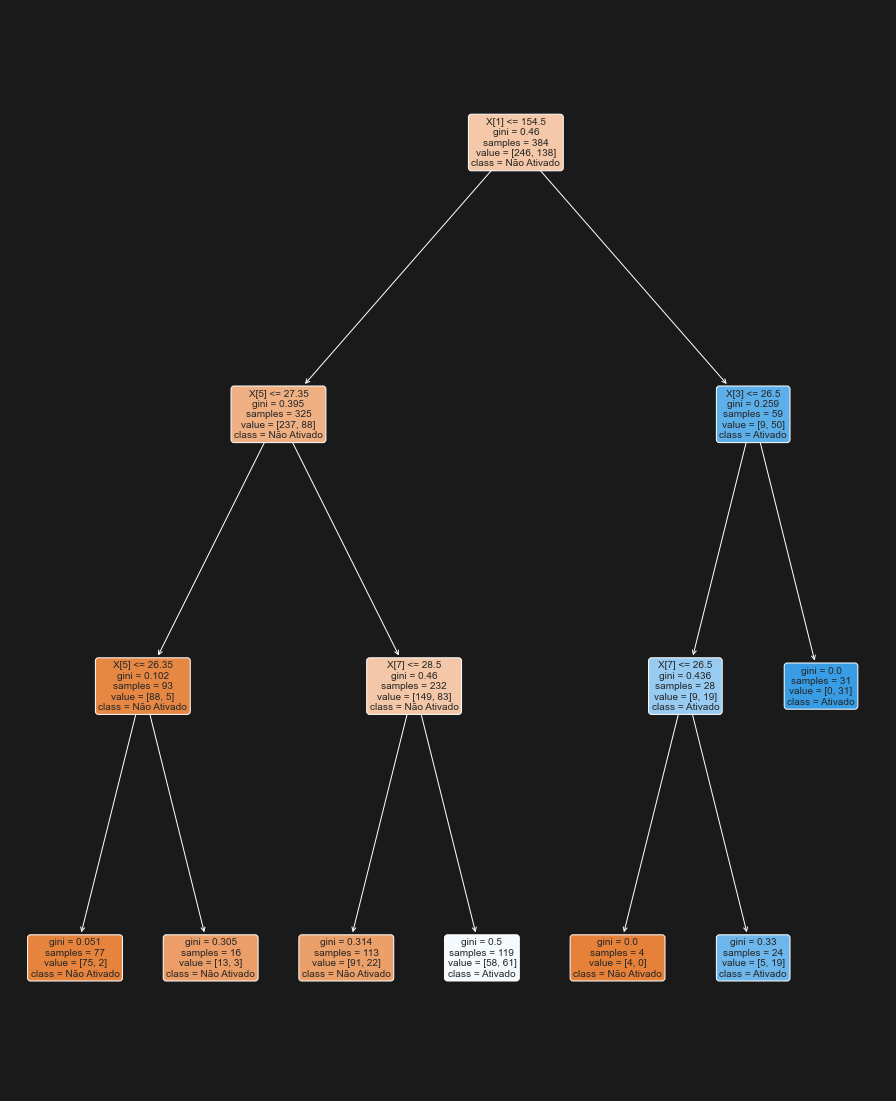

In [132]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15.8, 20), facecolor = "k")

tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 10, 
               rounded = True, 
               filled = True, 
               class_names = ["Não Ativado", "Ativado"])
plt.show()

In [86]:
modelo_arvore = DecisionTreeClassifier()
modelo_arvore_fit = modelo_arvore.fit(x_train, y_train)
modelo_arvore_pred = modelo_arvore.predict(x_train)
modelo_arvore_scor = modelo_arvore.score(x_train, y_train)
modelo_arvore_scor

1.0

In [88]:
modelo_arvore_pred = modelo_arvore.predict(x_train)
modelo_arvore_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [126]:
acuracia = metrics.accuracy_score(y_test, modelo_arvore_pred)

print("Acuracia - Decision Tree: %.2f" % (acuracia * 100))

Acuracia - Decision Tree: 51.04


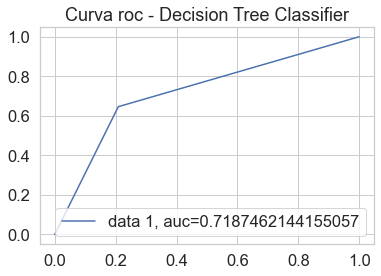

In [128]:
roc_g = modelo_arvore.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Decision Tree Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

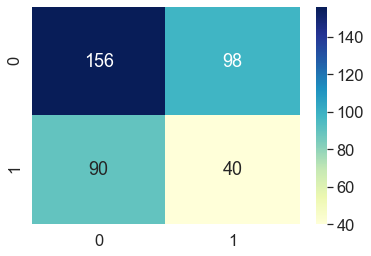

In [94]:
matrix = confusion_matrix(y_test, modelo_arvore_pred)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

In [124]:
class_report = classification_report(y_train, modelo_arvore_pred)
print("Modelo 02 - Decision Tree")
print("\n")
print(class_report)

Modelo 02 - Decision Tree


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       138

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [127]:
print("Modelo - 02 Decision Tree")
print("\n")
print("Precision - Decision Tree = {}".format(precision_score(y_test, modelo_arvore_pred, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_test, modelo_arvore_pred, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_test, modelo_arvore_pred)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_test, modelo_arvore_pred, average='macro')))

Modelo - 02 Decision Tree


Precision - Decision Tree = 0.4620007069635914
Recall - Decision Tree = 0.4609327680193822
Accuracy - Decision Tree = 0.5104166666666666
F1 Score - Decision Tree = 0.4612537313432836


# Validação cruzada

In [58]:
from sklearn.model_selection import cross_validate

results = cross_validate(modelo_arvore_cla, 
                         x_train, 
                         y_train, 
                         cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

print(f"Mean train score {np.mean(results['train_score']):.2f}")
print(f"Mean test score {np.mean(results['test_score']):.2f}")

Mean train score 1.00
Mean test score 0.64


# Modelo de Hiper-parametros 

In [120]:
from sklearn.model_selection import GridSearchCV

parametros = {
  "max_depth" : [3, 5],
  "min_samples_split" : [32, 64, 128],
  "min_samples_leaf" : [32, 64, 128],
  "criterion" : ["gini", "entropy"]
}

modelo_arvore_cla = DecisionTreeClassifier()
DTCG = GridSearchCV(modelo_arvore_cla, parametros, cv = 5, return_train_score = True, scoring = "accuracy")
grid_fit = DTCG.fit(x, y)
results_GridSearchCV = grid_fit.cv_results_
parametros = grid_fit.best_index_
grid_pred = DTCG.predict(x_train)

print(f"Mean train score {results_GridSearchCV['mean_train_score'][parametros]:.2f}")
print(f"mean test score {results_GridSearchCV['mean_test_score'][parametros]:.2f}")

Mean train score 0.80
mean test score 0.75


In [61]:
results_GridSearchCV["params"][parametros]

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 32,
 'min_samples_split': 32}

In [62]:
acuracia = metrics.accuracy_score(y_test, grid_pred)

print("Acuracia: %.2f" % (acuracia * 100))

Acuracia: 57.29


In [113]:
SEED = 123456

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

parametros = {
    "max_depth" : randint(1, 10),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "criterion" : ["gini", "entropy"]
}

modelo_arvore_cla = DecisionTreeClassifier()
DTC = RandomizedSearchCV(modelo_arvore_cla, parametros, random_state=SEED, cv=5, return_train_score=True, n_iter=10, scoring='accuracy')
RandomizedSearchCV_fit = DTC.fit(x_train, y_train)
pred_randomized_search_cv = DTC.predict(x_train)
results_RandomizedSearchCV = RandomizedSearchCV_fit.cv_results_
parametros = RandomizedSearchCV_fit.best_index_

print("Parametros - RandomizedSearchCV:", parametros)
print("\n")

print(f"Mean Train Score {results_RandomizedSearchCV['mean_train_score'][parametros]:.2f}")
print(f"Mean Test Score {results_RandomizedSearchCV['mean_test_score'][parametros]:.2f}")
print("\n")
      
resut = results_RandomizedSearchCV['params'][parametros]
print(resut)
print("\n")
      
acuracia = metrics.accuracy_score(y_test, pred_randomized_search_cv)
print("Acuracia - Randomized search cv: %.2f" % (acuracia * 100))

Parametros - RandomizedSearchCV: 8


Mean Train Score 0.76
Mean Test Score 0.72


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 47}


Acuracia - Randomized search cv: 50.52


# Resultados final

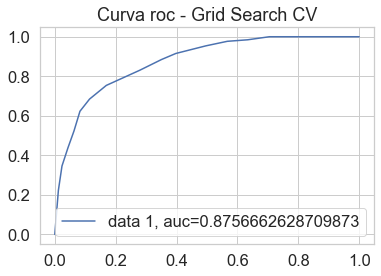

In [122]:
roc_g = DTCG.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Grid Search CV")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

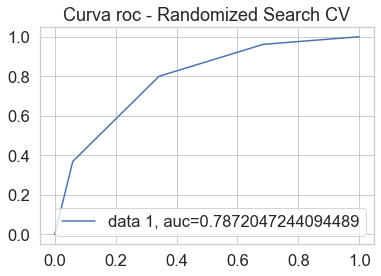

In [123]:
roc_g = DTC.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Randomized Search CV")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

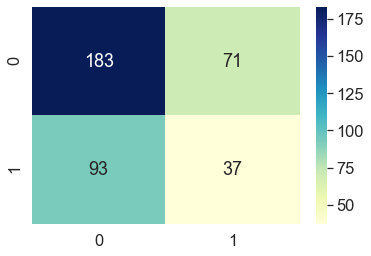

In [82]:
matrix = confusion_matrix(y_test, grid_pred)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

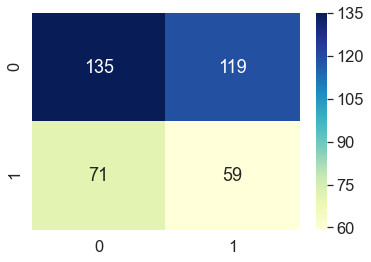

In [83]:
matrix = confusion_matrix(y_test, pred_randomized_search_cv)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

In [98]:
print("GridSearchCV")
print("\n")
print(classification_report(y_train, grid_pred))

print("RandomizedSearchCV")
print("\n")
print(classification_report(y_train, pred_randomized_search_cv))

GridSearchCV


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       246
           1       0.75      0.59      0.66       138

    accuracy                           0.78       384
   macro avg       0.77      0.74      0.75       384
weighted avg       0.78      0.78      0.77       384

RandomizedSearchCV


              precision    recall  f1-score   support

           0       0.87      0.73      0.79       246
           1       0.62      0.80      0.70       138

    accuracy                           0.76       384
   macro avg       0.75      0.77      0.75       384
weighted avg       0.78      0.76      0.76       384



In [116]:
print("Modelo - GridSearchCV")
print("Precision - Decision Tree = {}".format(precision_score(y_test, pred_randomized_search_cv, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_test, pred_randomized_search_cv, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_test, pred_randomized_search_cv)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_test, pred_randomized_search_cv, average='macro')))
print("\n")

print("Modelo - Randomized SearchCV")
print("Precision - Decision Tree = {}".format(precision_score(y_test, pred_randomized_search_cv, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_test, pred_randomized_search_cv, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_test, pred_randomized_search_cv)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_test, pred_randomized_search_cv, average='macro')))

print("\n")
print("Modelo - 01 Regressão logística")
print("Precision - Regressão logística = {}".format(precision_score(y_test, model_logistic_reg_pred, average='macro')))
print("Recall - Regressão logística = {}".format(recall_score(y_test, model_logistic_reg_pred, average='macro')))
print("Accuracy - Regressão logística = {}".format(accuracy_score(y_test, model_logistic_reg_pred)))
print("F1 Score - Regressão logística = {}".format(f1_score(y_test, model_logistic_reg_pred, average='macro')))

print("\n")
print("Modelo - 02 Decision Tree")
print("Precision - Decision Tree = {}".format(precision_score(y_test, modelo_arvore_pred, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_test, modelo_arvore_pred, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_test, modelo_arvore_pred)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_test, modelo_arvore_pred, average='macro')))

Modelo - GridSearchCV
Precision - Decision Tree = 0.493400239991273
Recall - Decision Tree = 0.49267110841913997
Accuracy - Decision Tree = 0.5052083333333334
F1 Score - Decision Tree = 0.4850367024280068


Modelo - Randomized SearchCV
Precision - Decision Tree = 0.493400239991273
Recall - Decision Tree = 0.49267110841913997
Accuracy - Decision Tree = 0.5052083333333334
F1 Score - Decision Tree = 0.4850367024280068


Modelo - 01 Regressão logística
Precision - Regressão logística = 0.7772638071208298
Recall - Regressão logística = 0.7695639006662629
Accuracy - Regressão logística = 0.7994791666666666
F1 Score - Regressão logística = 0.7730688054031236


Modelo - 02 Decision Tree
Precision - Decision Tree = 0.4620007069635914
Recall - Decision Tree = 0.4609327680193822
Accuracy - Decision Tree = 0.5104166666666666
F1 Score - Decision Tree = 0.4612537313432836
